In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
%matplotlib inline

In [122]:
kobe_df = pd.read_csv('data.csv')

In [123]:
kobe_df.head()


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [124]:
kobe_df.columns

Index([u'action_type', u'combined_shot_type', u'game_event_id', u'game_id',
       u'lat', u'loc_x', u'loc_y', u'lon', u'minutes_remaining', u'period',
       u'playoffs', u'season', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag', u'shot_type', u'shot_zone_area', u'shot_zone_basic',
       u'shot_zone_range', u'team_id', u'team_name', u'game_date', u'matchup',
       u'opponent', u'shot_id'],
      dtype='object')

In [125]:
def unique_values(KobeDF):
    for col in kobe_df.columns:
        print "___________" + col + "______________"
        print KobeDF[col].unique()
        
        
unique_values(kobe_df)

___________action_type______________
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Dri

### What is Kobe's action selection?

In [126]:
shot_type_counts = kobe_df['action_type'].value_counts()


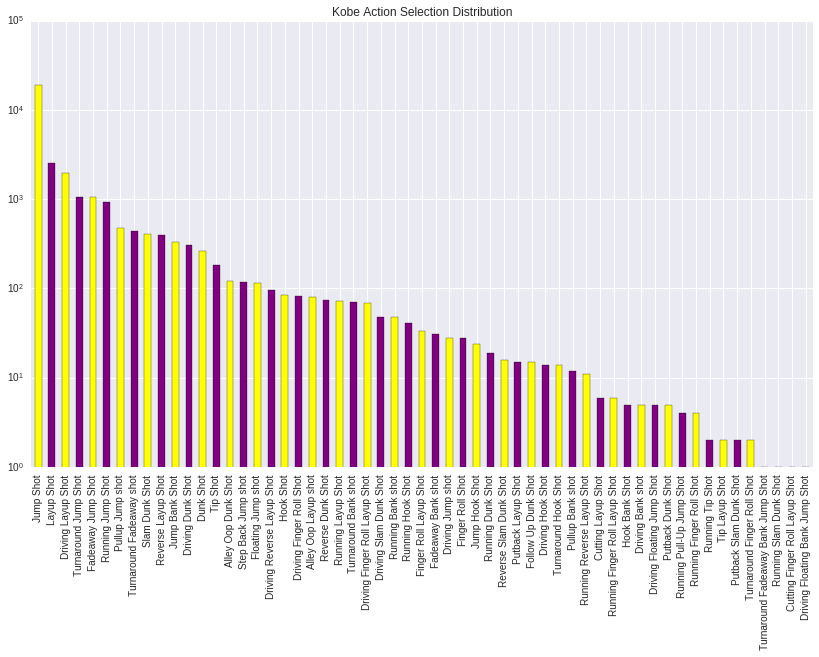

In [127]:
shot_type_counts.plot(kind = 'bar', logy = True, figsize = (14,8), title = 'Kobe Action Selection Distribution',
                    color = ['yellow','purple'])

### Where does Kobe score from around the court?

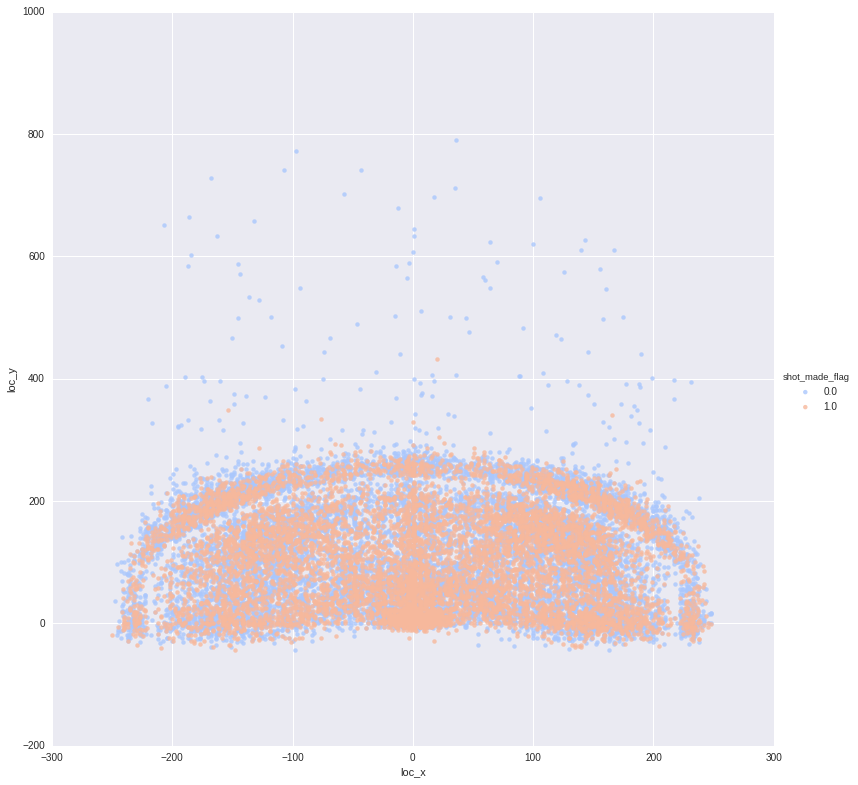

In [128]:
sns.lmplot('loc_x','loc_y', data = kobe_df, hue = 'shot_made_flag', scatter = True, fit_reg = False, palette = 'coolwarm', size = 11)

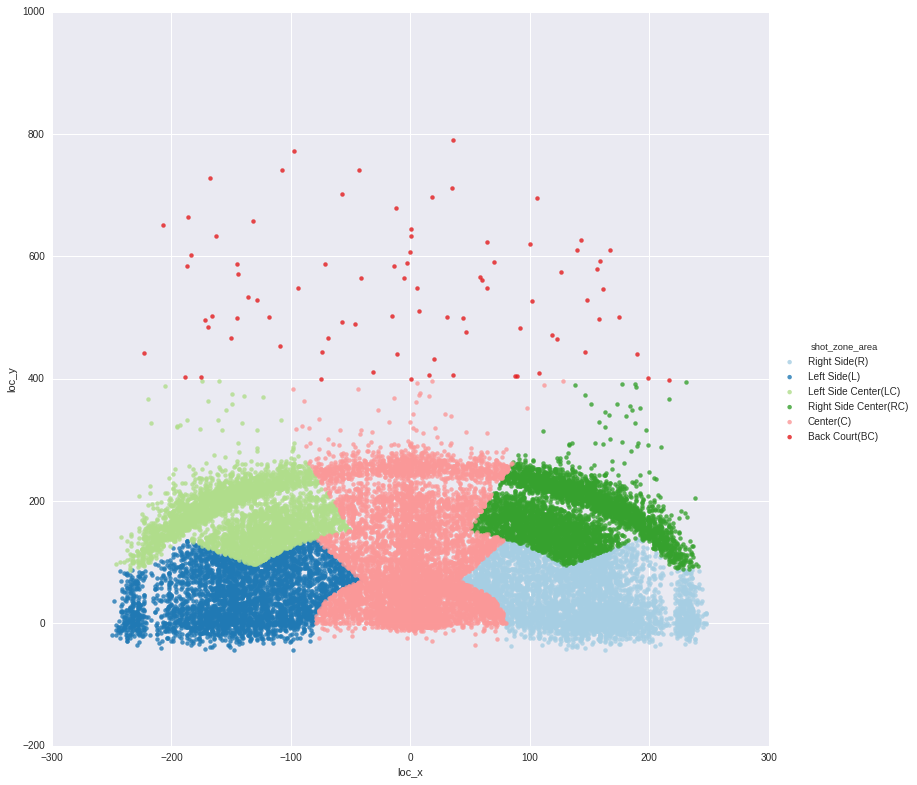

In [129]:
sns.lmplot('loc_x','loc_y', data = kobe_df, hue = 'shot_zone_area', scatter = True, fit_reg = False, palette = 'Paired', size = 11)

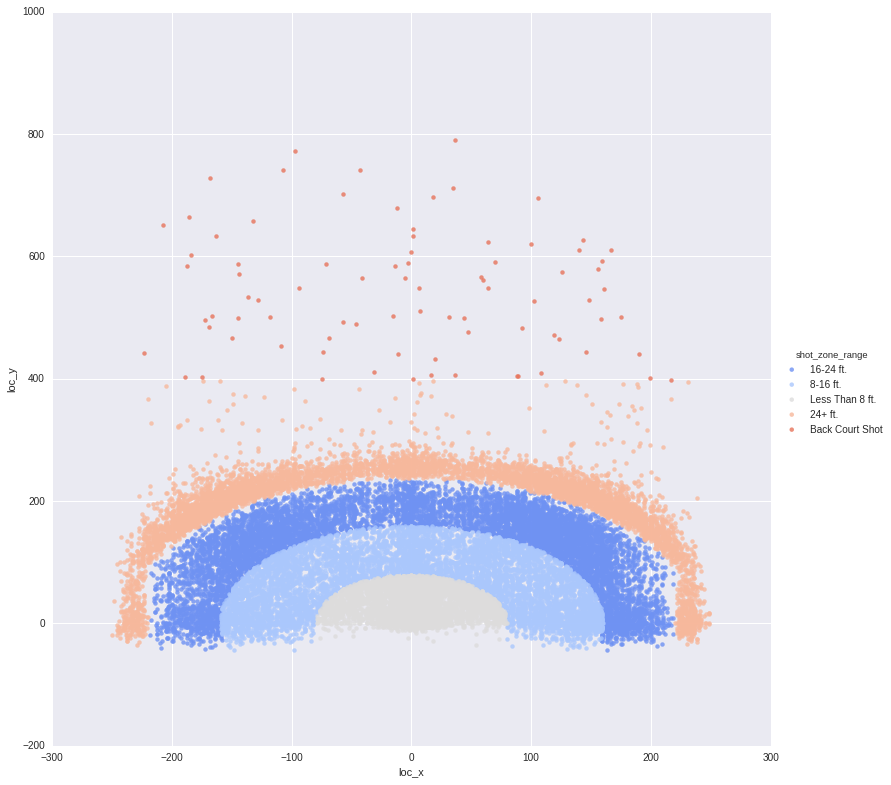

In [179]:
sns.lmplot('loc_x','loc_y', data = kobe_df, hue = 'shot_zone_range', scatter = True, fit_reg = False, palette = 'coolwarm', size = 11)

### How many of Kobe's shots result in a point?

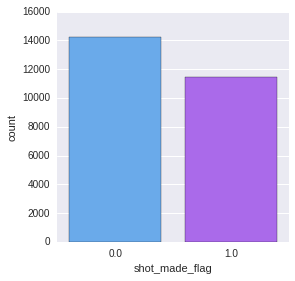

In [130]:
sns.factorplot('shot_made_flag', data = kobe_df, palette = 'cool', kind = 'count')

### Which period does he score in?

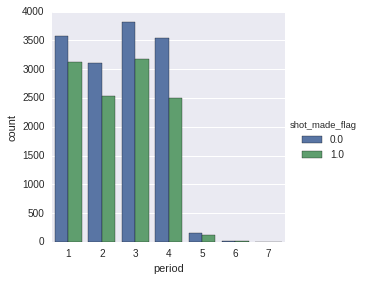

In [131]:
sns.factorplot('period', data = kobe_df, kind = 'count', hue = 'shot_made_flag')

### Kobe's points distribution 

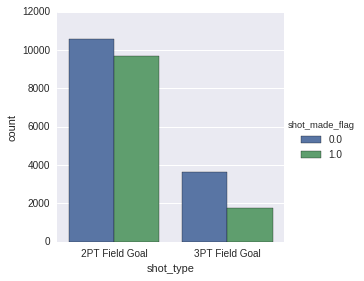

In [181]:
sns.factorplot('shot_type', data = kobe_df, kind = 'count', hue = 'shot_made_flag')

### Shooting distribution among opponents

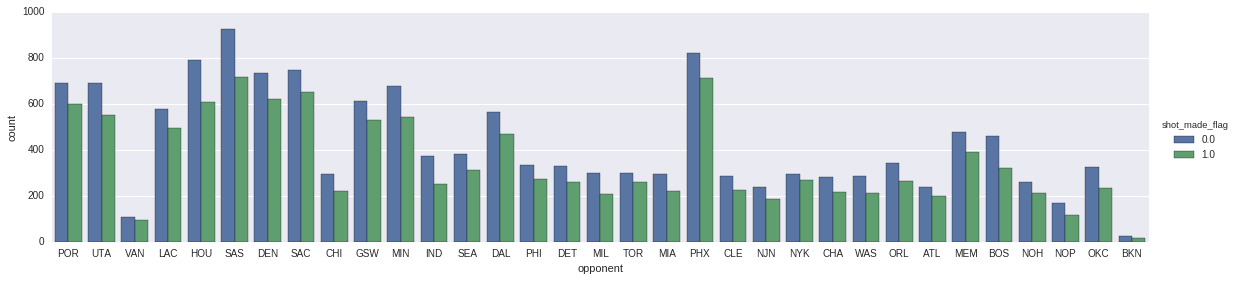

In [134]:
sns.factorplot('opponent', data = kobe_df, kind = 'count', hue = 'shot_made_flag', aspect = 4)

### Scoring distribution with minutes remaining

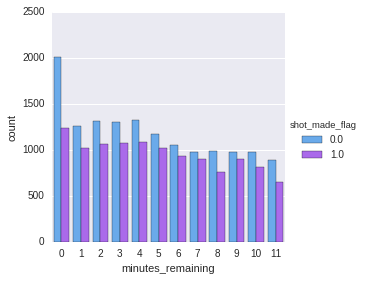

In [135]:
sns.factorplot('minutes_remaining', data = kobe_df, hue = 'shot_made_flag',palette = 'cool', kind = 'count')

### What percentage of last minute shots does kobe make in the playoffs?

In [137]:
min_group = kobe_df.groupby(['minutes_remaining','playoffs'])

In [138]:
min_group.mean().ix[[0,1]]['shot_made_flag']


minutes_remaining  playoffs
0                  0           0.387097
                   1           0.343558
Name: shot_made_flag, dtype: float64

#### Kobe makes about 34% of all the last minute shots in playoffs

In [140]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=mNz_JemCjHU')

### From which area's does Kobe score?

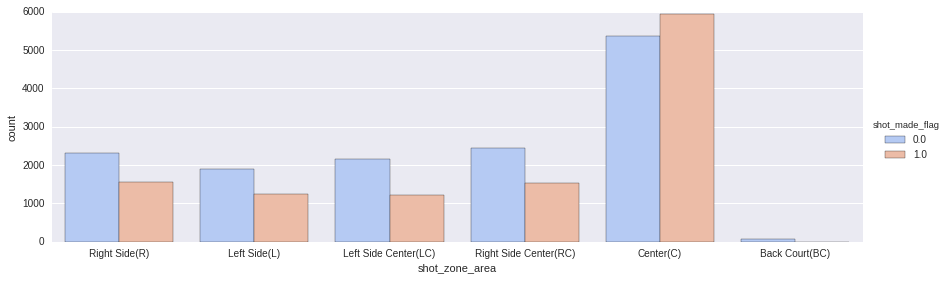

In [142]:
sns.factorplot('shot_zone_area',data = kobe_df, hue = 'shot_made_flag', kind = 'count', palette = 'coolwarm', aspect = 3, size = 4)

#### Kobe seems to score best from the central position

### Which is the most effective  action type + combined shot type

In [145]:
best_shooting = kobe_df.groupby(['action_type','combined_shot_type'])

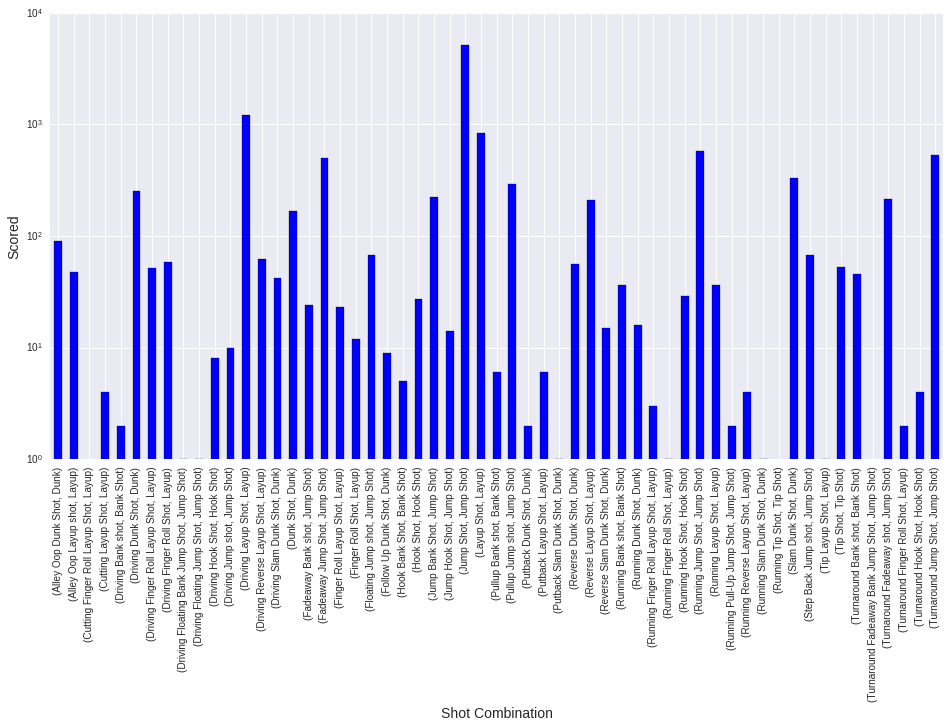

In [146]:
t = best_shooting.sum()['shot_made_flag'].plot( logy = True, kind = 'bar', figsize = (16,8), color = 'b', rot = 90)
plt.xlabel('Shot Combination', fontsize = 14)
plt.ylabel('Scored', fontsize = 14)

## Let us predict Kobe's shots

For this case it would be preferable to use logistic regression since were dealing with a binary classification problem
 of whether he will score or not given a certain combination of factors. 

 Before we do this, we will have to clean up our data a little bit by taking out the dummy values

In [150]:
kobe_df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [151]:
kobe_df.isnull().values.any()

True

In [152]:
kobe_df.dtypes


action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [153]:
kobe_df2 = kobe_df.drop(['game_event_id','game_id','lat','lon','team_id','team_name','shot_id'], axis = 1)

In [160]:
kobe_df3 = kobe_df2


In [162]:
target = kobe_df3['shot_made_flag']
        

In [163]:
kobe_df3 = kobe_df3.drop('shot_made_flag', 1)

In [165]:
kobe_df3.isnull().values.any()

False

In [158]:
kobe_df3.head()

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
0,Jump Shot,Jump Shot,167,72,10,1,0,2000-01,27,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,-101,135,7,1,0,2000-01,45,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,138,175,6,1,0,2000-01,52,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,0,0,6,2,0,2000-01,19,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR


Converting all the text values into their ordinal forms

In [169]:
for name in kobe_df3.dtypes.index:
    if kobe_df3.dtypes[name] == 'object':
        kobe_df3[name] = pd.Categorical(kobe_df3[name]).codes
        

In [170]:
kobe_df3.head()

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
0,26,3,167,72,10,1,0,4,27,18,0,5,4,0,310,28,25
1,26,3,-157,0,10,1,0,4,22,15,0,3,4,2,310,28,25
2,26,3,-101,135,7,1,0,4,45,16,0,2,4,0,310,28,25
3,26,3,138,175,6,1,0,4,52,22,0,4,4,0,310,28,25
4,5,1,0,0,6,2,0,4,19,0,0,1,5,4,310,28,25


Now that we have cleaned up our data all the values in numerical form, we can perform logistic regression on it

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.api as sm

 Our dataframe and target contain NaN values which can affect the regression, we will fill them with 0's in order to not
 affect the regression

### Logistic Regression

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(kobe_df3,target.fillna(0))

In [175]:
log_model = LogisticRegression()

In [176]:
log_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [177]:
predicted = log_model.predict(X_test)

In [178]:
print metrics.accuracy_score(Y_test,predicted)

0.653941368078


### Naive Bayes

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(kobe_df3,target.fillna(0))

In [184]:
from sklearn.naive_bayes import GaussianNB

In [186]:
model = GaussianNB()

In [187]:
model.fit(X_train,Y_train)

GaussianNB()

In [188]:
pred = model.predict(X_test)

In [190]:
print metrics.accuracy_score(Y_test,pred)

0.634006514658


### Random Forests

In [191]:
from sklearn.ensemble import RandomForestRegressor

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(kobe_df3,target.fillna(0))

In [193]:
rtfr = RandomForestRegressor()

In [194]:
rtfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [195]:
pred2 = rtfr.predict(X_test)

In [198]:
pred2 = np.round(pred2)

In [200]:
#Recheck